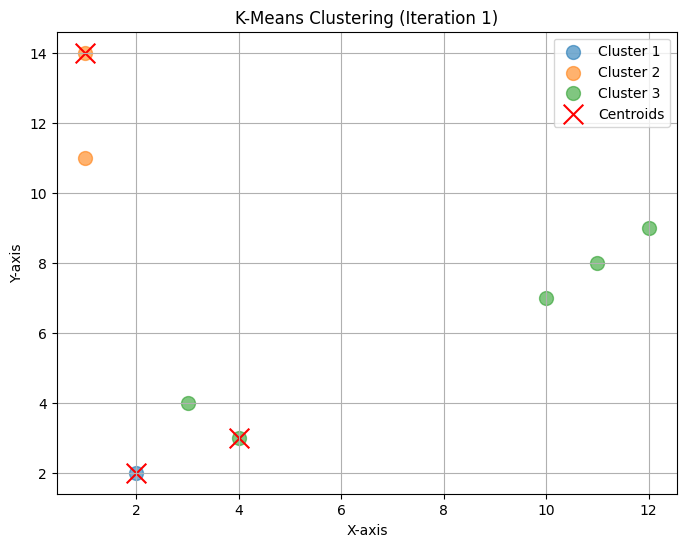

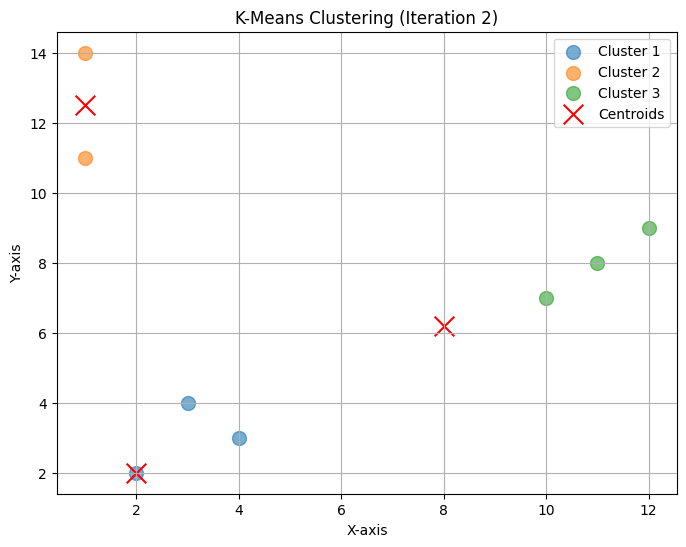

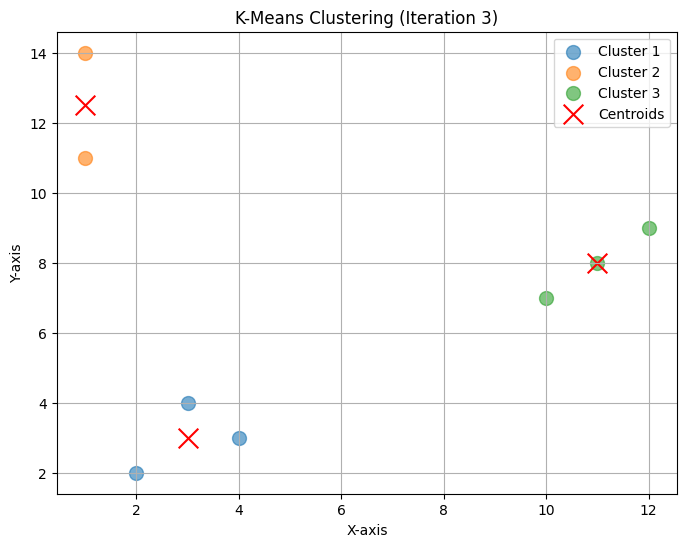

Centroids converged. Stopping early. 2
Plots saved in the directory: kmeans_steps_Example_1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Points data
points = np.array([
    [2, 2],  # P1
    [1, 14],  # P2
    [10, 7],  # P3
    [1, 11],  # P4
    [3, 4],  # P5
    [11, 8],  # P6
    [4, 3],  # P7
    [12, 9],  # P8
])
point_names = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8"]

# Initial centroids: P1, P2, and P7
initial_centroids = np.array([
    [2, 2],  # P1
    [1, 14],  # P2
    [4, 3],  # P7
])

# Number of iterations to compute
iterations = 20
output_dir = "kmeans_steps_Example_1"  # Directory to save the plots

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize centroids
centroids = initial_centroids

# Perform clustering iterations
for iteration in range(iterations):
    # Step 1: Assign points to the nearest centroid
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)  # Euclidean distances
    labels = np.argmin(distances, axis=1)  # Assign to nearest cluster

    # Step 2: Update centroids
    new_centroids = np.array([
        points[labels == cluster].mean(axis=0) if np.any(labels == cluster) else centroids[cluster]
        for cluster in range(len(centroids))
    ])

    # Plot current iteration
    plt.figure(figsize=(8, 6))
    for cluster in range(len(centroids)):
        cluster_points = points[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, alpha=0.6, label=f'Cluster {cluster + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

    plt.title(f"K-Means Clustering (Iteration {iteration + 1})")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.legend()

    # Save the plot
    file_name = os.path.join(output_dir, f"iteration_{iteration + 1}.png")
    plt.savefig(file_name)
    plt.show()
    plt.close()

    # Check for convergence (if centroids do not change)
    if np.allclose(centroids, new_centroids):
        print(f"Centroids converged. Stopping early. {iteration}")
        break

    centroids = new_centroids  # Update centroids for the next iteration

print(f"Plots saved in the directory: {output_dir}")
